In [34]:
import pandas as pd
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame


start = datetime.datetime(2018, 9, 6)
end = datetime.datetime(2019, 9, 6)

df = web.DataReader("AMZN", 'yahoo', start, end)
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-08-30,1799.739990,1764.569946,1797.489990,1776.290039,3058700,1776.290039
2019-09-03,1800.800049,1768.000000,1770.000000,1789.839966,3543000,1789.839966
2019-09-04,1807.630005,1796.229980,1805.000000,1800.619995,2324100,1800.619995
2019-09-05,1842.000000,1815.579956,1821.949951,1840.719971,3310800,1840.719971
2019-09-06,1840.650024,1826.400024,1838.219971,1833.510010,2489700,1833.510010


In [4]:
web.DataReader?


In [35]:
dfreg = df.loc[:,['Adj Close','Volume']]
dfreg['HL_PCT'] = (df['High'] - df['Low']) / df['Close'] * 100.0
dfreg['PCT_change'] = (df['Close'] -df['Open']) / df['Open'] * 100.0

In [36]:
df.shape

(252, 6)

In [37]:
df.columns


Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [38]:
dfreg = df.loc[:,['Adj Close','Volume']]
dfreg['HL_PCT'] = (df['High'] - df['Low']) / df['Close'] * 100.0
dfreg['PCT_change'] = (df['Close'] - df['Open']) / df['Open'] * 100.0

In [39]:
dfreg.shape

(252, 4)

In [40]:
dfreg.describe()

,Adj Close,Volume,HL_PCT,PCT_change
count,252.000000,2.520000e+02,252.000000,252.000000
mean,1773.572542,5.128629e+06,2.410314,-0.085229
std,143.740063,2.346798e+06,1.557157,1.783364
min,1343.959961,1.690300e+06,0.522751,-7.296385
25%,1656.489960,3.372775e+06,1.378068,-0.912289
50%,1787.114990,4.581800e+06,1.976134,-0.049204
75%,1894.679993,6.259675e+06,2.948825,0.742857
max,2020.989990,1.496380e+07,11.095081,7.452024


In [47]:
import math
# Drop missing value
dfreg.fillna(value=-99999, inplace=True)
# We want to separate 1 percent of the data to forecast
forecast_out = int(math.ceil(0.01 * len(dfreg)))
# Separating the label here, we want to predict the AdjClose
forecast_col = 'Adj Close'
dfreg['label'] = dfreg[forecast_col].shift(-forecast_out)

In [48]:
dfreg.columns

Index(['Adj Close', 'Volume', 'HL_PCT', 'PCT_change', 'label'], dtype='object')

In [42]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-09-06,2007.500000,1935.209961,2006.510010,1958.310059,7488700,1958.310059
2018-09-07,1975.199951,1937.349976,1938.709961,1952.069946,4892600,1952.069946
2018-09-10,1973.040039,1931.520020,1971.000000,1939.010010,4544800,1939.010010
2018-09-11,1988.880005,1917.000000,1928.270020,1987.150024,5033600,1987.150024
2018-09-12,2000.000000,1962.439941,1994.000000,1990.000000,4414000,1990.000000


In [49]:
import numpy as np
X = np.array(dfreg.drop(['label'], 1))


In [53]:
X

array([[ 1.95831006e+03,  7.48870000e+06,  3.69145012e+00,
        -2.40217846e+00],
       [ 1.95206995e+03,  4.89260000e+06,  1.93896616e+00,
         6.89117280e-01],
       [ 1.93901001e+03,  4.54480000e+06,  2.14129991e+00,
        -1.62303350e+00],
       ...,
       [ 1.80062000e+03,  2.32410000e+06,  6.33116618e-01,
        -2.42659550e-01],
       [ 1.84071997e+03,  3.31080000e+06,  1.43531033e+00,
         1.03021598e+00],
       [ 1.83351001e+03,  2.48970000e+06,  7.77197830e-01,
        -2.56224011e-01]])

In [54]:
dfreg.head()

,Adj Close,Volume,HL_PCT,PCT_change,label
Date,,,,,
2018-09-06,1958.310059,7488700,3.691450,-2.402178,1987.150024
2018-09-07,1952.069946,4892600,1.938966,0.689117,1990.000000
2018-09-10,1939.010010,4544800,2.141300,-1.623033,1989.869995
2018-09-11,1987.150024,5033600,3.617241,3.053515,1970.189941
2018-09-12,1990.000000,4414000,1.887440,-0.200602,1908.030029


In [60]:
X.shape

(252, 4)

In [58]:
from sklearn import preprocessing
X = preprocessing.scale(X)

In [59]:
X

array([[ 1.28777705,  1.0076574 ,  0.8243777 , -1.30178682],
       [ 1.24427818, -0.10077489, -0.30329989,  0.4350694 ],
       [ 1.15323935, -0.24927177, -0.17310342, -0.86402127],
       ...,
       [ 0.18854367, -1.19742307, -1.14357991, -0.08845294],
       [ 0.46807448, -0.77614109, -0.62738924,  0.626717  ],
       [ 0.41781495, -1.1267184 , -1.05086742, -0.09607418]])

In [61]:
# Finally We want to find Data Series of late X and early X (train) for model generation and evaluation
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

In [62]:
X_lately

array([[ 0.18854367, -1.19742307, -1.14357991, -0.08845294],
       [ 0.46807448, -0.77614109, -0.62738924,  0.626717  ],
       [ 0.41781495, -1.1267184 , -1.05086742, -0.09607418]])

In [63]:
X_lately.shape

(3, 4)

In [64]:
X.shape

(249, 4)

In [65]:
# Separate label and identify it as y
y = np.array(dfreg['label'])
y = y[:-forecast_out]

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [78]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                      test_size=0.2,
                                                      random_state=0)

# Linear regression
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(X_train, y_train)
# Quadratic Regression 2
clfpoly2 = make_pipeline(PolynomialFeatures(2), Ridge())
clfpoly2.fit(X_train, y_train)

# Quadratic Regression 3
clfpoly3 = make_pipeline(PolynomialFeatures(3), Ridge())
clfpoly3.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

In [79]:
# KNN Regression
clfknn = KNeighborsRegressor(n_neighbors=2)
clfknn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=2, p=2,
          weights='uniform')

In [81]:
confidencereg = clfreg.score(X_test, y_test)
confidencepoly2 = clfpoly2.score(X_test,y_test)
confidencepoly3 = clfpoly3.score(X_test,y_test)
confidenceknn = clfknn.score(X_test, y_test)


In [82]:
print(confidencereg)
print(confidencepoly2)
print(confidencepoly3)
print(confidenceknn)

0.8058459544385139
0.7097681284329171
-0.5026100368823254
0.885218475545124


In [84]:
forecast_set = clfknn.predict(X_lately)
dfreg['Forecast'] = np.nan

In [88]:
forecast_set

array([1833.85003662, 1865.69000244, 1833.85003662])

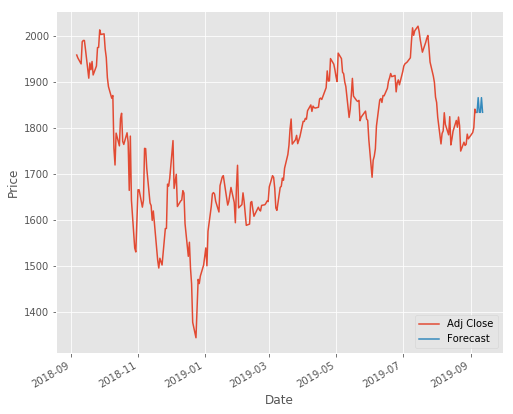

In [90]:

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')
last_date = dfreg.iloc[-1].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1)

for i in forecast_set:
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    dfreg.loc[next_date] = [np.nan for _ in range(len(dfreg.columns)-1)]+[i]
dfreg['Adj Close'].tail(500).plot()
dfreg['Forecast'].tail(500).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()